In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('bmh')

In [4]:
# read in features, parse the date column to date object

df = pd.read_csv('datasets/dengue_features_train.csv', parse_dates=[3])

# target

target = pd.read_csv('datasets/dengue_labels_train.csv')
target.head()

# add total cases into df
df['total_cases'] = target['total_cases']
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1456.0,2001.031593,5.408314,1990.000000,1997.000000,2002.000000,2005.000000,2010.000000
weekofyear,1456.0,26.503434,15.019437,1.000000,13.750000,26.500000,39.250000,53.000000
ndvi_ne,1262.0,0.142294,0.140531,-0.406250,0.044950,0.128817,0.248483,0.508357
ndvi_nw,1404.0,0.130553,0.119999,-0.456100,0.049217,0.121429,0.216600,0.454429
ndvi_se,1434.0,0.203783,0.073860,-0.015533,0.155087,0.196050,0.248846,0.538314
ndvi_sw,1434.0,0.202305,0.083903,-0.063457,0.144209,0.189450,0.246982,0.546017
precipitation_amt_mm,1443.0,45.760388,43.715537,0.000000,9.800000,38.340000,70.235000,390.600000
reanalysis_air_temp_k,1446.0,298.701852,1.362420,294.635714,297.658929,298.646429,299.833571,302.200000
reanalysis_avg_temp_k,1446.0,299.225578,1.261715,294.892857,298.257143,299.289286,300.207143,302.928571
reanalysis_dew_point_temp_k,1446.0,295.246356,1.527810,289.642857,294.118929,295.640714,296.460000,298.450000


In [6]:
target.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1456.0,2001.031593,5.408314,1990.0,1997.00,2002.0,2005.00,2010.0
weekofyear,1456.0,26.503434,15.019437,1.0,13.75,26.5,39.25,53.0
total_cases,1456.0,24.675137,43.596000,0.0,5.00,12.0,28.00,461.0


In [7]:
df_sj = df[df['city'] == 'sj']
df_iq = df[df['city'] == 'iq']

In [8]:
df_sj = df_sj.fillna(method = 'ffill')
df_iq = df_iq.fillna(method = 'ffill')

0.997502122997


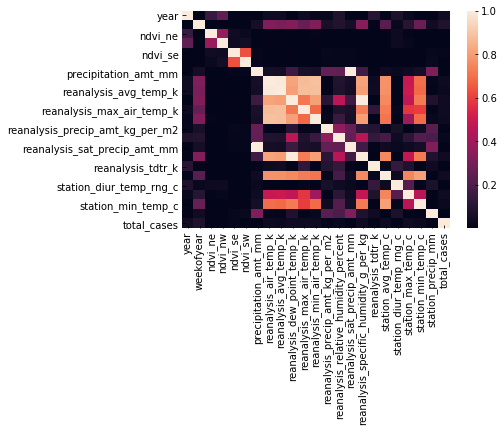

In [15]:
# San Juan
sns.heatmap(df_sj.corr()**2)
print(df_sj["reanalysis_air_temp_k"].corr(df_sj["reanalysis_avg_temp_k"]))

In [16]:
# set index to the dates
df_sj.set_index('week_start_date', drop = True, inplace = True)
df_iq.set_index('week_start_date', drop = True, inplace = True)

In [18]:
print(df_sj.head())

                city  year  weekofyear   ndvi_ne   ndvi_nw   ndvi_se  \
week_start_date                                                        
1990-04-30        sj  1990          18  0.122600  0.103725  0.198483   
1990-05-07        sj  1990          19  0.169900  0.142175  0.162357   
1990-05-14        sj  1990          20  0.032250  0.172967  0.157200   
1990-05-21        sj  1990          21  0.128633  0.245067  0.227557   
1990-05-28        sj  1990          22  0.196200  0.262200  0.251200   

                  ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
week_start_date                                                          
1990-04-30       0.177617                 12.42             297.572857   
1990-05-07       0.155486                 22.82             298.211429   
1990-05-14       0.170843                 34.54             298.781429   
1990-05-21       0.235886                 15.36             298.987143   
1990-05-28       0.247340                  7.52    

In [19]:


# create mean NVDI for each week for each city
df_sj['nvdi_mean'] = df_sj[df_sj.columns[3:7]].mean(axis = 1)
df_iq['nvdi_mean'] = df_iq[df_iq.columns[3:7]].mean(axis = 1)

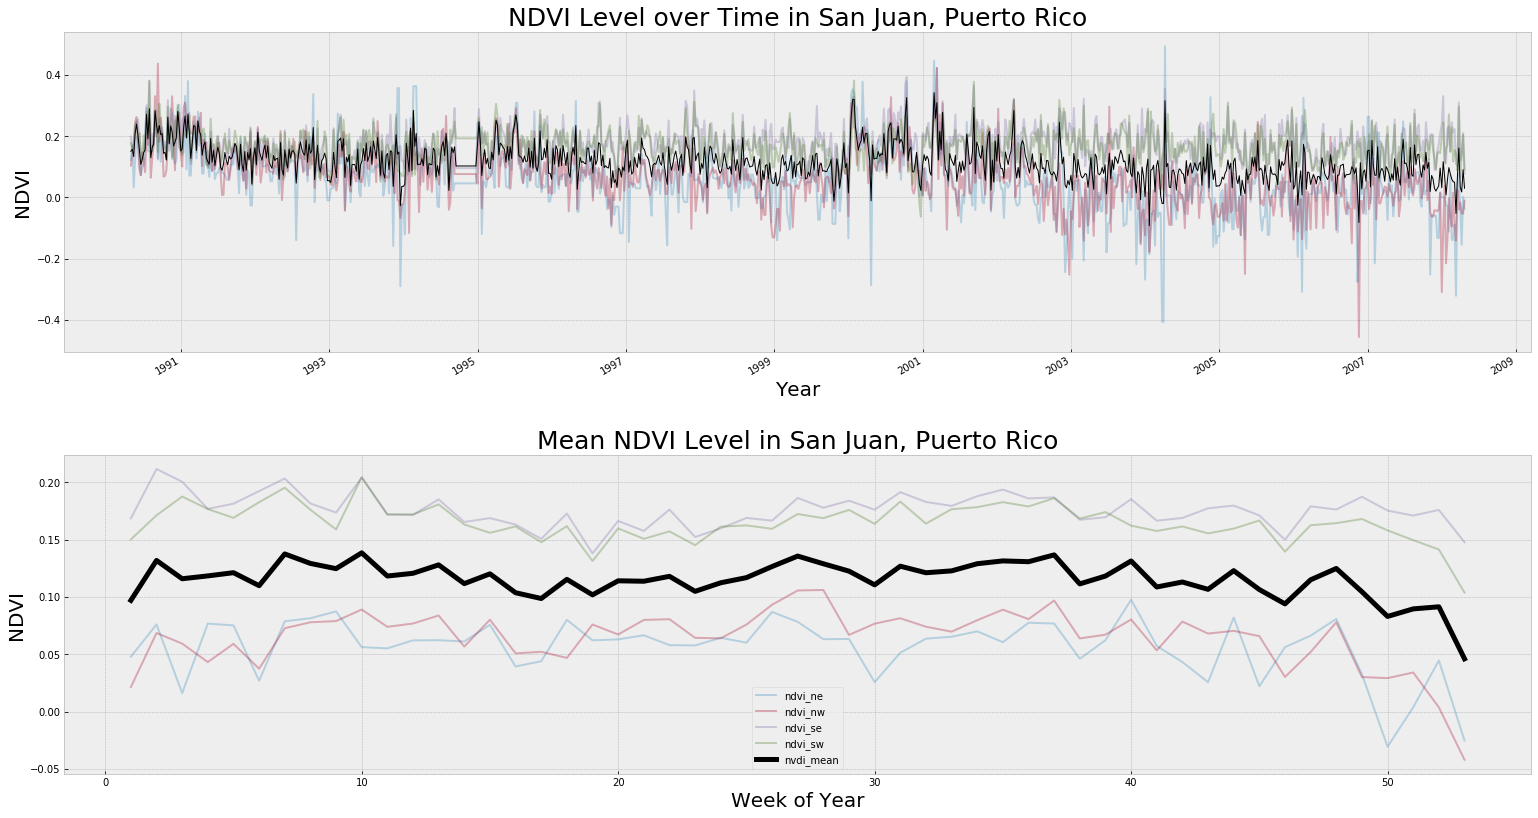

In [22]:


# plot week by week and yearly average for San Juan
fig, ax = plt.subplots(2, 1, figsize=(22, 12))

#top plot
plt.subplot(211)
for i in df_sj.columns[3:7]:
    df_sj[i].plot(alpha = .3)
df_sj['nvdi_mean'].plot(alpha = 1, c = 'k', linewidth = 1)
plt.title('NDVI Level over Time in San Juan, Puerto Rico', size = 25)
plt.xlabel('Year', size = 20)
plt.ylabel('NDVI', size = 20)

# bottom plot
plt.subplot(212)
for i in df_iq.columns[3:7]:
    df_sj.groupby('weekofyear')[i].mean().plot(alpha = .3)
df_sj.groupby('weekofyear')['nvdi_mean'].mean().plot(alpha = 1, c = 'k', linewidth = 5)
plt.title('Mean NDVI Level in San Juan, Puerto Rico', size = 25)
plt.xlabel('Week of Year', size = 20)
plt.ylabel('NDVI', size = 20)
plt.legend(loc = 'best')
    
plt.tight_layout(pad=3)
